In [8]:
# %pip install ifcopenshell --upgrade
# %pip install openxml --upgrade
# %pip install pandas --upgrade

In [9]:
import ifcopenshell
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [10]:
file_path = r"2022020320211122Wellness center Sama.ifc"
ifc_file = ifcopenshell.open(file_path)
ifc_file

In [11]:
# get all classes
classes = ifc_file.by_type("IfcProduct")
# print all class name
class_names = [class_name.is_a() for class_name in classes]
class_names = list(set(class_names))
class_names.sort()
class_names

['IfcBuilding',
 'IfcBuildingElementProxy',
 'IfcBuildingStorey',
 'IfcColumn',
 'IfcCurtainWall',
 'IfcDistributionPort',
 'IfcDoor',
 'IfcFlowTerminal',
 'IfcFurnishingElement',
 'IfcMember',
 'IfcOpeningElement',
 'IfcPlate',
 'IfcRailing',
 'IfcRamp',
 'IfcSite',
 'IfcSlab',
 'IfcStair',
 'IfcStairFlight',
 'IfcWallStandardCase',
 'IfcWindow']

In [12]:


file_name = "result.xlsx"
with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
    for class_name in class_names:
        # get all objects in class
        objects = ifc_file.by_type(class_name)
        
        # Create a list to store data for the current class
        
        result_df = pd.DataFrame()
        for object in objects:
            class_data = {}
            # get dict of properties and values
            psets  = ifcopenshell.util.element.get_psets(object)
            for name, value in psets.items():
                if isinstance(value, dict):
                    for key, val in value.items():
                        class_data[key] = val
                else:
                    pass
            class_df =  pd.DataFrame(class_data, index=[0])
            result_df = pd.concat([result_df, class_df], ignore_index=True)
        if(result_df.empty):
            continue
        result_df.to_excel(writer, sheet_name=class_name, index=False)
        # set auto fit column width
        worksheet = writer.sheets[class_name]
        for idx, col in enumerate(worksheet.columns):
            worksheet.column_dimensions[col[0].column_letter].width = 20


In [15]:
# read excel 
df = pd.read_excel(file_name, sheet_name=None)
list(df.keys())

['IfcBuilding',
 'IfcBuildingElementProxy',
 'IfcBuildingStorey',
 'IfcColumn',
 'IfcCurtainWall',
 'IfcDoor',
 'IfcFlowTerminal',
 'IfcFurnishingElement',
 'IfcMember',
 'IfcOpeningElement',
 'IfcPlate',
 'IfcRailing',
 'IfcRamp',
 'IfcSite',
 'IfcSlab',
 'IfcStair',
 'IfcStairFlight',
 'IfcWallStandardCase',
 'IfcWindow']

In [27]:
# show data IfcDoor
df['IfcDoor'].head(20)

,PanelOperation,PanelPosition,id,IsExternal,Reference,Category,ThermalTransmittance
0,SWINGING,NOTDEFINED,76119,True,my door,Doors,NaN
1,SWINGING,NOTDEFINED,76274,False,0813 x 2134mm,Doors,3.702100
2,SWINGING,NOTDEFINED,76314,False,0813 x 2134mm,Doors,3.702100
3,SWINGING,NOTDEFINED,76424,False,0813 x 2134mm,Doors,3.702100
4,NOTDEFINED,NOTDEFINED,76658,False,my door 2,Doors,3.128723
5,SWINGING,NOTDEFINED,216289,False,"24"" x 80""",Doors,NaN
6,SWINGING,NOTDEFINED,216412,False,0762 x 2032mm,Doors,3.702100
7,SWINGING,NOTDEFINED,265930,False,0762 x 2032mm,Doors,3.702100
8,NOTDEFINED,NOTDEFINED,266247,False,showers,Doors,3.128723
9,NOTDEFINED,NOTDEFINED,266294,False,showers,Doors,3.128723


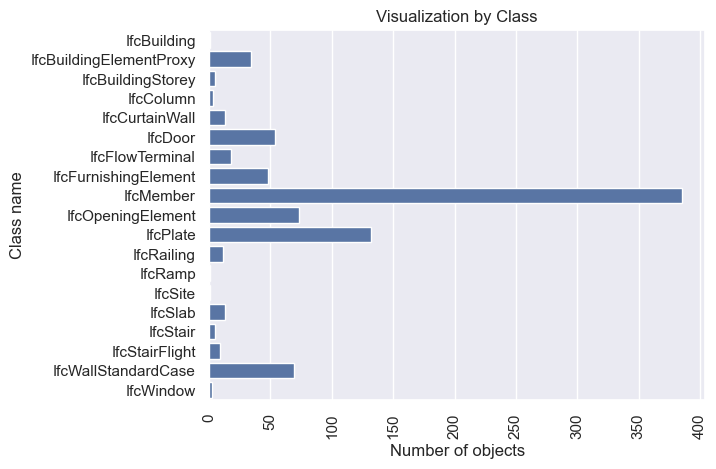

In [36]:
# Visualization by categories 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
# visualize data df dictionary, y is class name, x is number of objects
sns.barplot(y=list(df.keys()), x=[len(df[key]) for key in df.keys()])
plt.xticks(rotation=90)
plt.ylabel("Class name")
plt.xlabel("Number of objects")
plt.title("Visualization by Class")
plt.show()